# DATS6103 - Intoduction to Data Mining
## Individual Project 3

### By Fahim Ishrak

Github - https://github.com/fajim1/DATS6103-Project-3
Github.io - https://fajim1.github.io/
Zenodo - https://zenodo.org/record/3572547#.XfJnEDM3k2w

# Topic - The attitude towards mental health in tech workplaces and their consequences in the most populous US states

# Part 1- Loading the data and Pre-processing


In [95]:
#Importing Relevant Packages
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette('Set2')
rc = {'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8'}
plt.rcParams.update(rc)

import warnings
warnings.filterwarnings("ignore")



## The following csv file was downloaded from https://www.kaggle.com/osmi/mental-health-in-tech-2016

### This dataset is a survey with 63 questions and 1400 responses, the 2016 survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers. It is used for gauging how mental health is viewed within the tech/IT workplace, and the prevalence of certain mental health disorders within the tech industry. 

In [96]:
# Reading the CSV files into the notebook
survey = pd.read_csv('mental-heath-in-tech-2016.csv')

- There are 63 questions and 1433 survey participants. 
- Some responses have a lot of null values, which is because self-employed did not answer the same set of questions as those who are not self-employed.

In [97]:
survey.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [98]:
# Getting a more detailed view of the columns,its index, and the values
real_features=(list(survey))
for index,val in enumerate(real_features):
    p=survey[val].unique()
    print(index,val)
    print(p)
    print('\n')


0 Are you self-employed?
[0 1]


1 How many employees does your company or organization have?
['26-100' '25-Jun' nan 'More than 1000' '100-500' '500-1000' '5-Jan']


2 Is your employer primarily a tech company/organization?
[  1.  nan   0.]


3 Is your primary role within your company related to tech/IT?
[ nan   1.   0.]


4 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]


5 Do you know the options for mental health care available under your employer-provided coverage?
[nan 'Yes' 'I am not sure' 'No']


6 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' nan "I don't know"]


7 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' nan "I don't know"]


8 Is your anonymity protected if you choose to take advantage of mental hea

In [99]:
#Including the necessary columns from the dataset
survey = survey.iloc[:,[0,1,4,6,7,8,9,10,12,13,15,16,18,21,38,39,40,42,46,47,50,51,52,55,56,57,58,59,60,61,62]]


In [100]:
survey.head()

,Are you self-employed?,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,...,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,Maybe,Yes,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,No,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Maybe,...,NaN,1,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [101]:
#Renaming the columns with shorter names 

survey.columns = ['self_employed','total_employees','mental_health_benefits','discussion_of_mental_health_by_employers',
                'resource_from_employers','anonimity_when_seeking_help','ease_of_medical_leave','negative_consequences_for_discussing',
                'comfortable_discussing_with_coworkers','comfortable_discussing_with_supervisors','observed_negative_consequences',
               'medical_coverage','revealed_disorder_to_clients','revealed_disorder_to_coworkers','bring_up_during_interview','why_bring_up',
                'will_mental_illness_hurt_career','share_with_family','mental_disorder_in_past','mental_disorder_now','ever_diagnosed',
                'diagnosis','sought_treatment','age','gender','country_of_residence','state_of_residence','country_of_work','work_state',
                'work_position','work_remotely']

In [102]:
#Including responses of people living and working in the US only
survey = survey[survey['country_of_work']=='United States of America']
survey = survey[survey['country_of_residence']=='United States of America']

#Including responses of people who are not self-employed 
survey = survey[survey['self_employed']==0]

In [103]:
survey.drop(['self_employed','country_of_residence','country_of_work'],axis=1,inplace=True)

In [104]:
survey.head()

,total_employees,mental_health_benefits,discussion_of_mental_health_by_employers,resource_from_employers,anonimity_when_seeking_help,ease_of_medical_leave,negative_consequences_for_discussing,comfortable_discussing_with_coworkers,comfortable_discussing_with_supervisors,observed_negative_consequences,...,mental_disorder_now,ever_diagnosed,diagnosis,sought_treatment,age,gender,state_of_residence,work_state,work_position,work_remotely
1,25-Jun,No,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,Illinois,Illinois,Back-end Developer|Front-end Developer,Never
4,25-Jun,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,Illinois,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
6,26-100,I don't know,No,No,I don't know,Somewhat easy,No,Maybe,Yes,No,...,No,No,NaN,0,30,M,Tennessee,Tennessee,Back-end Developer,Sometimes
7,More than 1000,Yes,No,Yes,Yes,Very easy,No,Maybe,Yes,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,37,female,Virginia,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,26-100,I don't know,No,No,I don't know,Very difficult,Yes,Yes,Maybe,No,...,Yes,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,44,Female,California,California,Support|Back-end Developer|One-person shop,Sometimes


In [105]:
#dropping them since they are for self-employed peoples only
survey.drop(['medical_coverage','revealed_disorder_to_clients','revealed_disorder_to_coworkers'],axis=1,inplace=True)

In [106]:
#replace the 1 and 0 with yes and no respectively in order to keep it categorical 
survey['sought_treatment'] = survey['sought_treatment'].replace([
    0], 'No')
survey['sought_treatment'] = survey['sought_treatment'].replace([
    1], 'Yes')
survey['sought_treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [107]:
#The range incorrectly got saved and imported as the month so correcting it with the appropiate values 
survey['total_employees'] = survey['total_employees'].replace([
    '25-Jun'], '6-25')
survey['total_employees'] = survey['total_employees'].replace([
    '5-Jan'], '1-5')
survey['total_employees'].unique()

array(['6-25', '26-100', 'More than 1000', '100-500', '500-1000', '1-5'], dtype=object)

In [108]:
survey.describe()

,age
count,708.000000
mean,34.396893
std,13.750838
min,19.000000
25%,28.000000
50%,32.000000
75%,38.000000
max,323.000000


In [109]:
survey.describe(include=['O'])

,total_employees,mental_health_benefits,discussion_of_mental_health_by_employers,resource_from_employers,anonimity_when_seeking_help,ease_of_medical_leave,negative_consequences_for_discussing,comfortable_discussing_with_coworkers,comfortable_discussing_with_supervisors,observed_negative_consequences,...,mental_disorder_in_past,mental_disorder_now,ever_diagnosed,diagnosis,sought_treatment,gender,state_of_residence,work_state,work_position,work_remotely
count,708,708,708,708,708,708,708,708,708,708,...,708,708,708,391,708,706,708,708,708,708
unique,6,4,3,3,3,6,3,3,3,2,...,3,3,2,65,2,44,47,48,124,3
top,26-100,Yes,No,No,I don't know,Somewhat easy,Maybe,Maybe,Yes,No,...,Yes,Yes,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",Yes,Male,California,California,Back-end Developer,Sometimes
freq,179,427,503,265,455,162,307,303,271,653,...,400,327,393,95,453,295,110,118,133,405


In [110]:
#replacing the weird ages with the mean age instead of dropping the row
survey.loc[(survey['age'] > 90), 'age'] = 34
survey.loc[(survey['age'] < 10), 'age'] = 34


#### Some of the data does not make sense. For instance, the maximum age is 323. However, the average age is 34, which may imply that these may be typos. Thus, instead of dropping the rows with weird ages, I changed them to 34


In [111]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
survey['gender'] = survey['gender'].replace([
    'male', 'Male ', 'M', 'm', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Dude', 'mail', 'male ', 'Cis Male',
    'cisdude', 'cis man'], 'Male')
survey['gender'] = survey['gender'].replace([
    'female', 'female ', 'F', 'Woman', 'fm', 'f',
    'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman'], 'Female')
survey['gender'] = survey['gender'].replace([
    'non-binary', 'genderqueer', 'Human',
    'genderqueer woman', 'Agender', 'Genderflux demi-girl',
    'non-binary', 'Male/genderqueer', 'none of your business',
    'Genderqueer','Genderqueer/Other','Genderfluid','Other'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
survey['gender'] = survey['gender'].replace(np.NaN, 'Male')
survey['gender'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

#### There are 45 unique genders, which is due to the fact that participants were allowed to type their genders freely. I tried my best to group up the genders while respecting the participants' answers


#  Part 2 - Data Visualization

There are Three sub parts where 
- In the First part I will show some basic EDA
- In the Second part I will make relevant grouping by gender as well as current mental health condition
- In the Third part I will make relevant grouping by the most populous states

All of the data are categorical except for age and bring_up_during_interview (which is a string of texts which I used for NLP), so there will a lot of repetition of the same type of graph. Furthermore, I included relevant percentage plots alongside countplots in order to visualize both the absolute and the relative values

## Part 2a -  EDA

In [112]:
#Extracting work positions in order to graph it
position = {}

positionCounts = dict(survey['work_position'].value_counts())
for i in positionCounts:
    # getting the work position separately in case someone answered with more than one position
    positionList = i.split('|')
    for j in positionList:
        j = j.split(' (')[0]
        position[j] = position.get(j, 0) + positionCounts[i]
        

In [113]:
#making a new dataframe with the extracted work positions
tmp1 = pd.DataFrame()
for i in position:
    tmp1 = tmp1.append([i] * position[i])

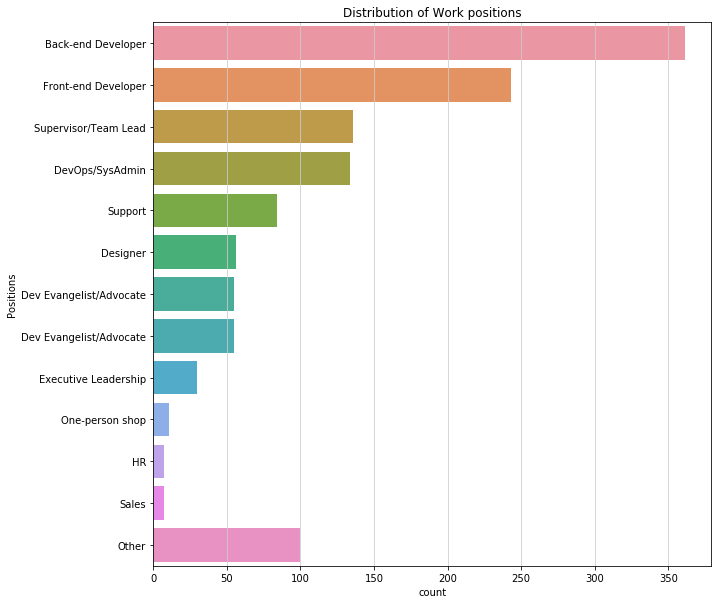

In [114]:
#Making a countplot of the work position
plt.figure(figsize=(10,10))
g = sns.countplot(y=tmp1[0], order=[
    'Back-end Developer', 'Front-end Developer', 'Supervisor/Team Lead',
    'DevOps/SysAdmin', 'Support','Designer','Dev Evangelist/Advocate',
    'Dev Evangelist/Advocate',
    'Executive Leadership','One-person shop','HR', 'Sales', 
    'Other'])
g.set_ylabel('Positions')
g.set_title('Distribution of Work positions')
plt.show()

In [115]:
survey['total_employees'].unique()

array(['6-25', '26-100', 'More than 1000', '100-500', '500-1000', '1-5'], dtype=object)

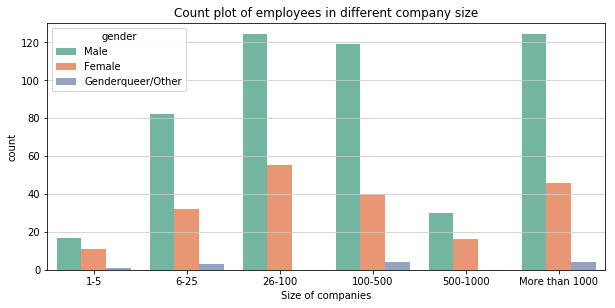

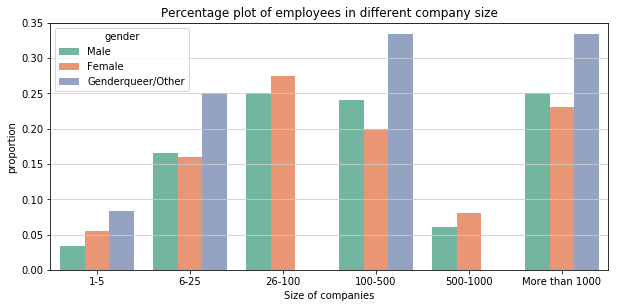

In [116]:
x, y, hue = "total_employees", "proportion", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = ['1-5','6-25','26-100','100-500','500-1000','More than 1000'])
plt.xlabel('Size of companies')
plt.title('Count plot of employees in different company size')
prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df, order = ['1-5','6-25','26-100','100-500','500-1000','More than 1000'],hue_order = ['Male','Female','Genderqueer/Other'])
plt.xlabel('Size of companies')
plt.title('Percentage plot of employees in different company size')
plt.show()

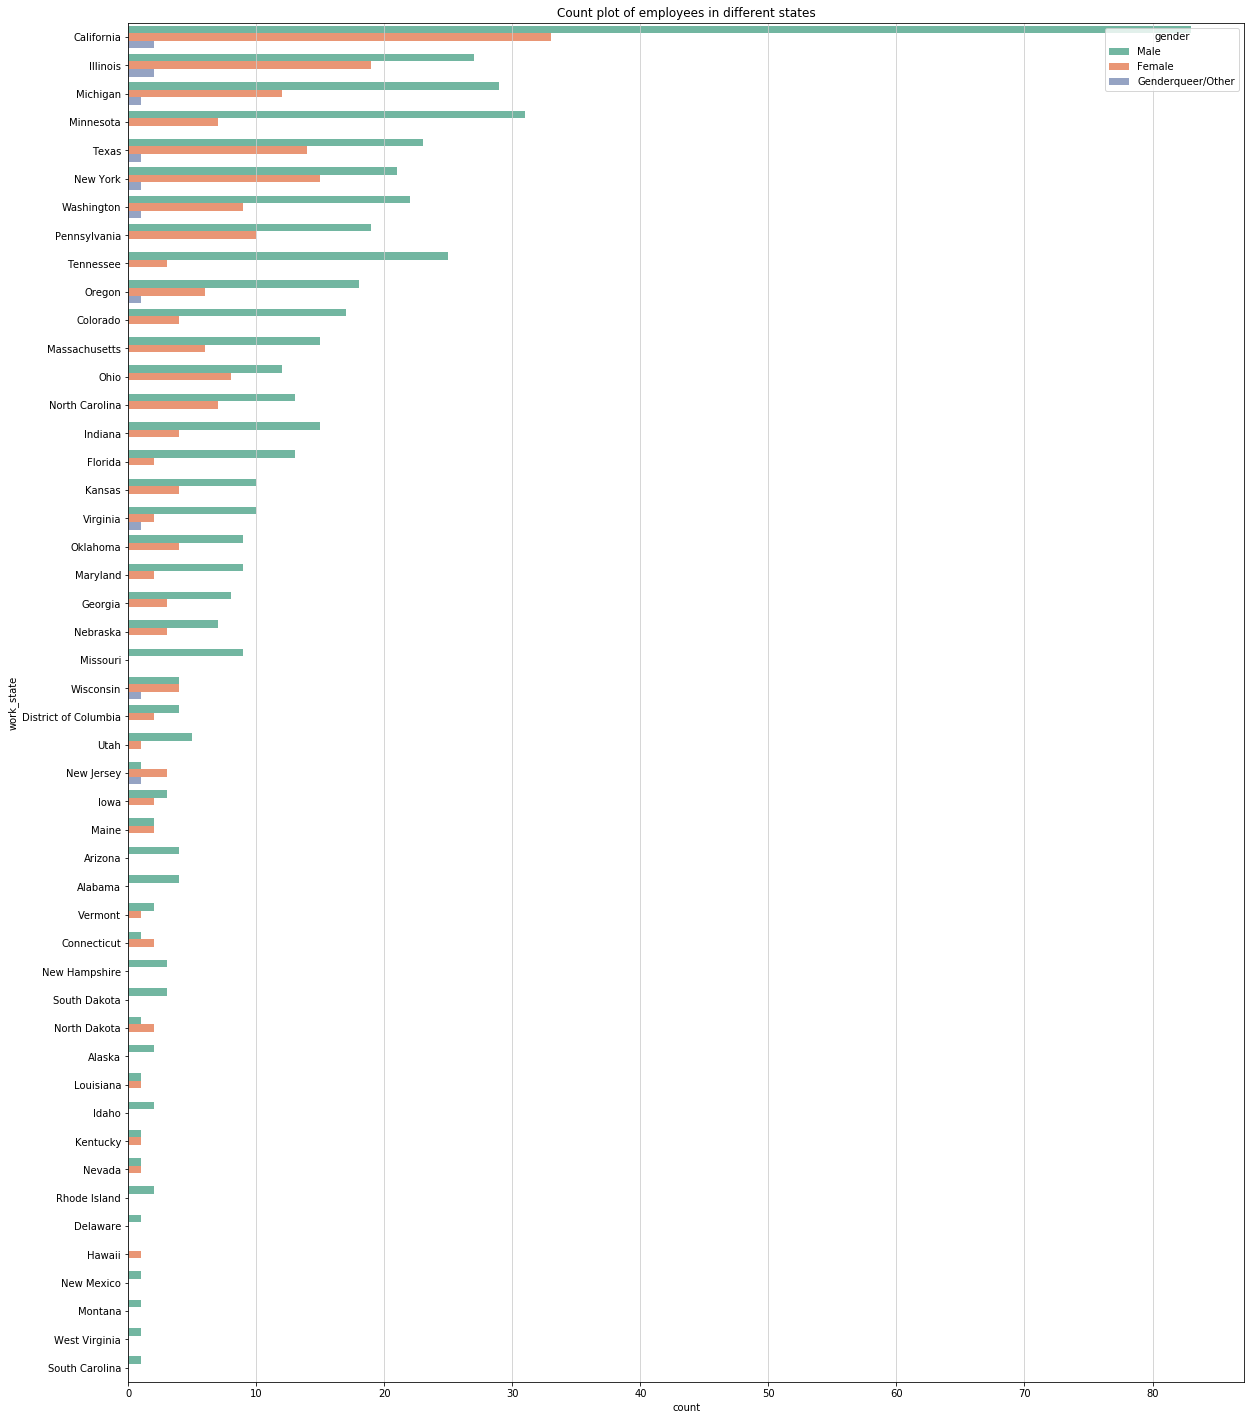

In [117]:
x, y, hue = "work_state", "prop", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(20,25))

sns.countplot(y=x, hue=hue, data=survey,order = survey['work_state'].value_counts().index)
plt.title('Count plot of employees in different states')




plt.show()

A higher number of males were surveyed than females from most of the states including the bigger ones. This probably reflects the distribution of males and females in their workplace too 

## Part 2b -  Grouping by gender as well as current mental health condition  

In [118]:
#Extracting work positions in order to graph it
disorders = {}

disorderCounts = dict(survey['diagnosis'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

In [119]:
#making a new dataframe with the extracted Mental Health Disorders
tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace([ 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')

tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')


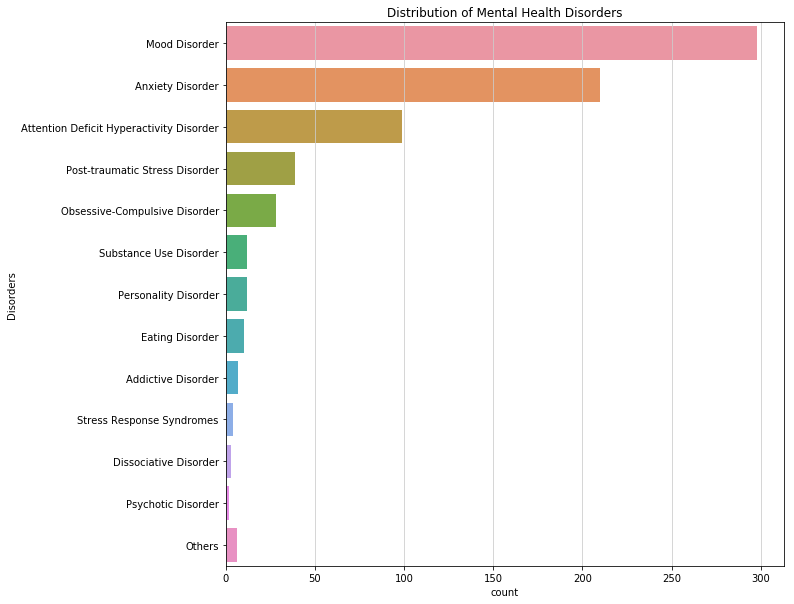

In [120]:
#Making a countplot of all the Mental Health Disorders
plt.figure(figsize=(10,10))
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Substance Use Disorder','Personality Disorder',
    'Eating Disorder', 'Addictive Disorder','Stress Response Syndromes', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

The most common mental health disorder appears to be mood disorder, followed by anxiety disorder.

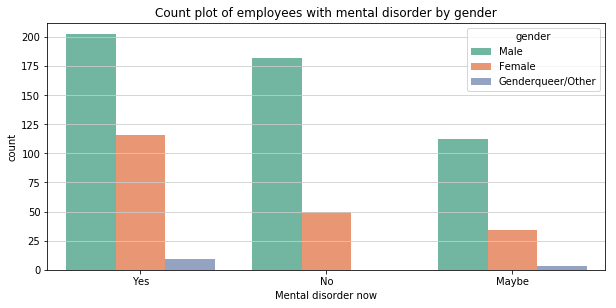

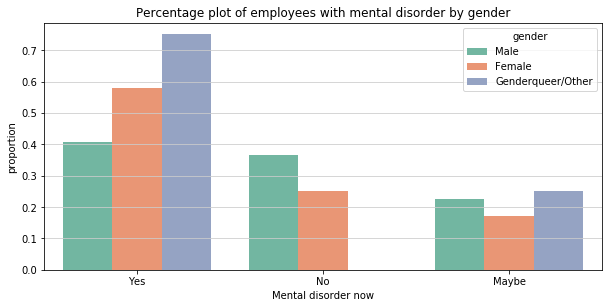

In [121]:
#Plotting count plot and percentage plot of employees with mental disorder by gender
x, y, hue = "mental_disorder_now", "proportion", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = survey['mental_disorder_now'].value_counts().index)

plt.xlabel('Mental disorder now')
plt.title('Count plot of employees with mental disorder by gender')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order = ['Male','Female','Genderqueer/Other'])

plt.xlabel('Mental disorder now')
plt.title('Percentage plot of employees with mental disorder by gender')

plt.show()

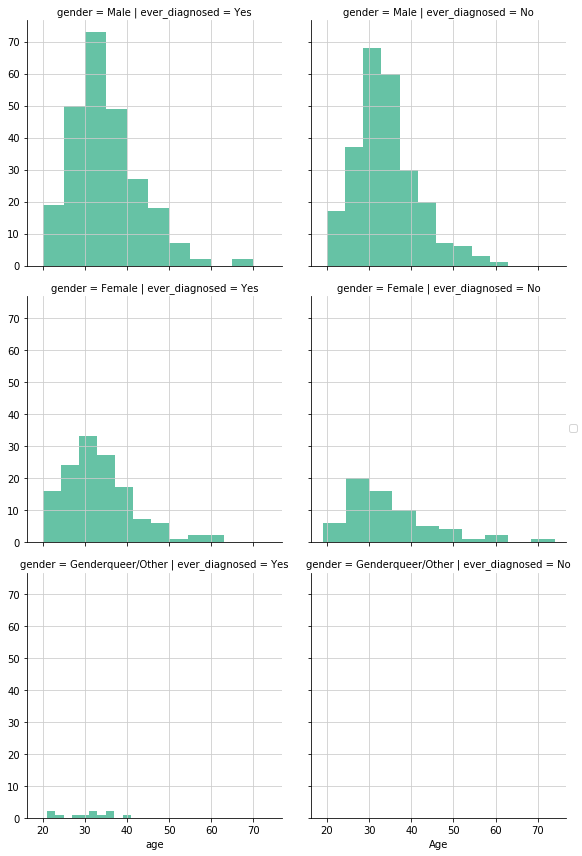

In [122]:
#Plotting Age distribution of employees using histograms
g = sns.FacetGrid(survey, row='gender', col='ever_diagnosed', size=4)
g.map(plt.hist, 'age', alpha=1, bins=10)
g.add_legend()
plt.xlabel('Age')



plt.show()


- Most of the employees are male, and the typical age of the employees is in the 30s
- It appears that there is slightly more male employees who do not have mental health disorders than male employees who do. 
- There are definitely more female employees who have mental health disorders than those who don't.

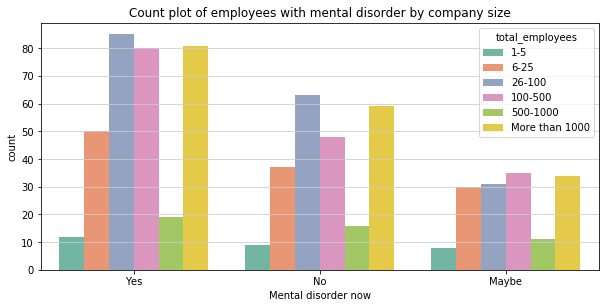

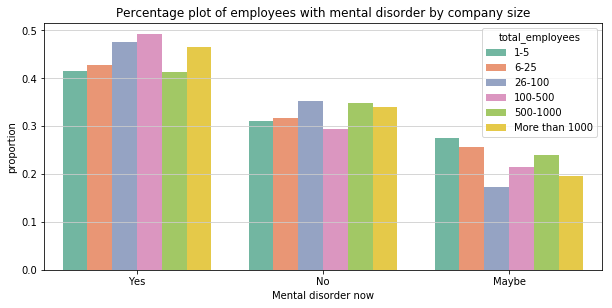

In [123]:
#Plotting count plot and percentage plot of employees with mental disorder by company size

x, y, hue = "mental_disorder_now", "proportion", "total_employees"
hue_order = ['6-25', '26-100', 'More than 1000', '100-500', '500-1000', '1-5']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = survey['mental_disorder_now'].value_counts().index,hue_order = ['1-5','6-25', '26-100', '100-500', '500-1000','More than 1000'])
plt.xlabel('Mental disorder now')
plt.title('Count plot of employees with mental disorder by company size')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order = ['1-5','6-25', '26-100', '100-500', '500-1000','More than 1000' ])

plt.xlabel('Mental disorder now')
plt.title('Percentage plot of employees with mental disorder by company size')

plt.show()

Mental health in general is higher across all company sizes and the size of the company doesn't seem to have any profound affect on having mental disorder

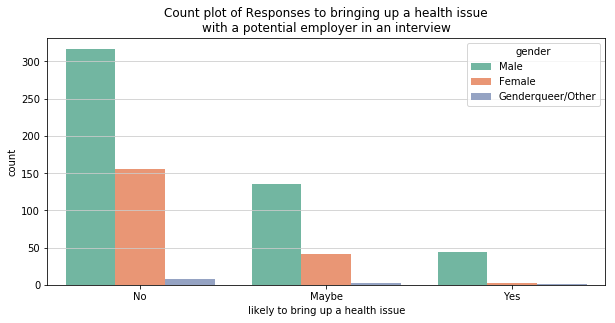

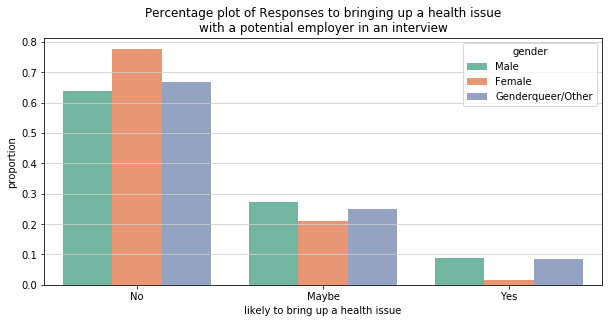

In [124]:
#Plotting count plot and percentage plot of employees with willingness to bring up mental health issue during interview by gender
x, y, hue = "bring_up_during_interview", "proportion", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = survey['bring_up_during_interview'].value_counts().index)
plt.title('Count plot of Responses to bringing up a health issue\nwith a potential employer in an interview')
plt.xlabel('likely to bring up a health issue')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order = ['Male','Female','Genderqueer/Other'])
plt.title('Percentage plot of Responses to bringing up a health issue\nwith a potential employer in an interview')
plt.xlabel('likely to bring up a health issue')
plt.show()

- Very few people of all genders are willing to bring up mental health issues during an interview with a potential employer. This may be due to the stigma or fear that the issue will get in the way of their performance, which may result in a potential employer to not offer them the job.
- It is interesting to note that a large majority of the female survey participants won't mention mental health issues during an interview.

In [125]:
#Performing NLP on the reasons for bringing up mental health issue during interview
#Seperating the three responses and then generating a word cloud for each
survey1 = survey.query('bring_up_during_interview == "Yes"')
survey2 = survey.query('bring_up_during_interview == "No"')
survey3 = survey.query('bring_up_during_interview == "Maybe"')

col = ['why_bring_up']
survey1.dropna(subset = col,how = 'any',inplace=True)
survey2.dropna(subset = col,how = 'any',inplace=True)
survey3.dropna(subset = col,how = 'any',inplace=True)

survey1.reset_index(drop = True,inplace=True)
survey2.reset_index(drop = True,inplace=True)
survey3.reset_index(drop = True,inplace=True)

survey1['why_bring_up']= survey1['why_bring_up'].astype('str')
survey2['why_bring_up']= survey2['why_bring_up'].astype('str')
survey3['why_bring_up']= survey3['why_bring_up'].astype('str')


In [126]:
# Cleaning the response texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
corpus2 = []
corpus3 = []
for i in range(0, len(survey1)-1):
    review = re.sub('[^a-zA-Z]', ' ', survey1['why_bring_up'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    for i in review:
          corpus1.append(i)
            

            
for i in range(0, len(survey2)-1):
    review = re.sub('[^a-zA-Z]', ' ', survey2['why_bring_up'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    for i in review:
          corpus2.append(i)
            
            
            
for i in range(0, len(survey3)-1):
    review = re.sub('[^a-zA-Z]', ' ', survey3['why_bring_up'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    for i in review:
          corpus3.append(i)
            
corpus1 = ' '.join(corpus1)
corpus2 = ' '.join(corpus2)
corpus3 = ' '.join(corpus3)


            

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


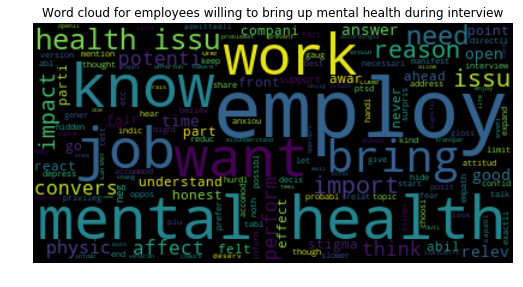

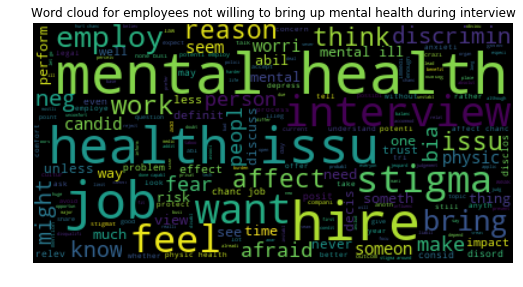

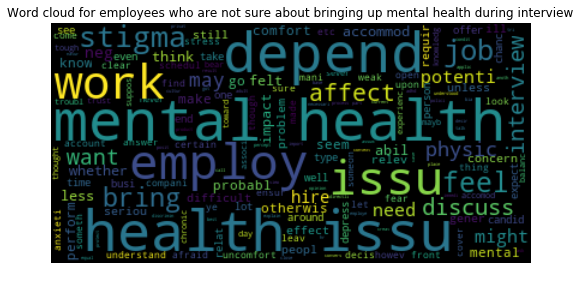

In [127]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud1 = WordCloud().generate(corpus1)
wordcloud2 = WordCloud().generate(corpus2)
wordcloud3 = WordCloud().generate(corpus3)



plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title("Word cloud for employees willing to bring up mental health during interview")
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
plt.title("Word cloud for employees not willing to bring up mental health during interview")
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(15,15))
plt.subplot(3,1,3)
plt.title("Word cloud for employees who are not sure about bringing up mental health during interview")
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

plt.show()

According to the above word cloud
- Employees who would bring up mental health issues during interview "want" the "employers" to "know" about it 
- Employees who would not bring up mental health issues during interview feel like they would be "discriminated" from the  "stigma" around mental health and they won't be able to land their "job" or be "hired"  

In [128]:

survey['will_mental_illness_hurt_career'] = survey['will_mental_illness_hurt_career'].replace([
    'Yes, it has', 'Yes, I think it would'], 'Yes')
survey['will_mental_illness_hurt_career'] = survey['will_mental_illness_hurt_career'].replace([
    'No, it has not', "No, I don't think it would"], 'No')
survey['will_mental_illness_hurt_career'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

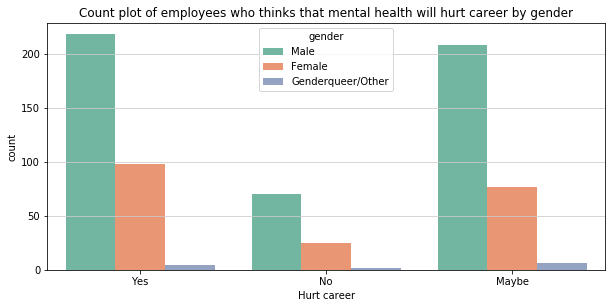

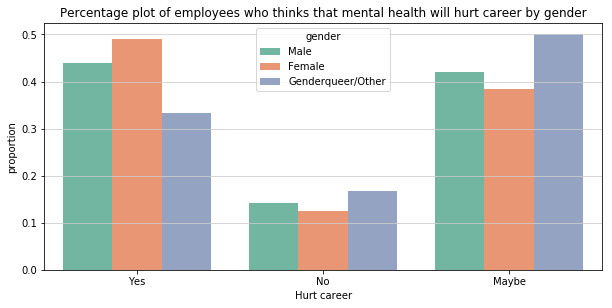

In [129]:
#Plotting count plot and percentage plot of employees who thinks that mental health will hurt career by gender
x, y, hue = "will_mental_illness_hurt_career", "proportion", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No', 'Maybe'])

plt.title('Count plot of employees who thinks that mental health will hurt career by gender')
plt.xlabel('Hurt career')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order=['Yes','No', 'Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])


plt.title('Percentage plot of employees who thinks that mental health will hurt career by gender')
plt.xlabel('Hurt career')

plt.show()







- The majority of the survey participants believe that being identified as a person having a mental health issue would hurt their career.
- This is likely to be the reason why many people would not mention their mental health issue to a potential employer during an interview since they are worried it would affect their chance at getting the job offer.


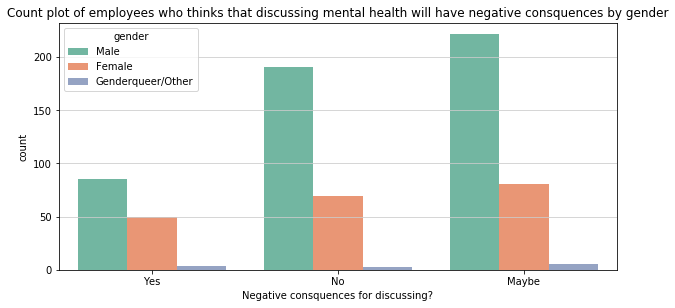

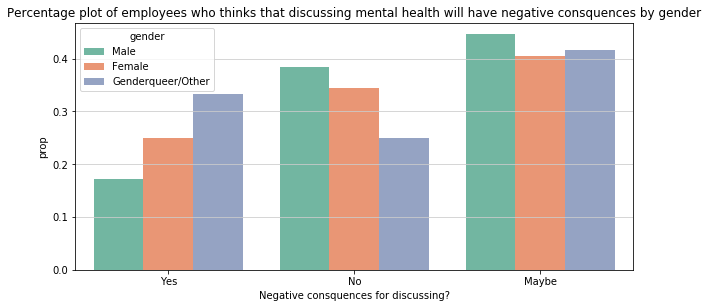

In [130]:
#Plotting count plot and percentage plot of employees who thinks that there are negative consequences for discussing mental health by gender

x, y, hue = "negative_consequences_for_discussing", "prop", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No','Maybe'])

plt.title('Count plot of employees who thinks that discussing mental health will have negative consquences by gender')
plt.xlabel('Negative consquences for discussing?')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order = ['Yes','No','Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])

plt.title('Percentage plot of employees who thinks that discussing mental health will have negative consquences by gender')
plt.xlabel('Negative consquences for discussing?')

plt.show()




- Whether or not discussing mental health disorders with employers will result in negative consequences is more divided.
- Some people believe that discussing mental health disorders will result in a negative consequences.
- However, a larger proportion believe there won't be any negative consequences or unsure. This may be because they have already developed a employer-employee relationship and there is a layer of trust when it comes to talking about issues that are on people's minds.

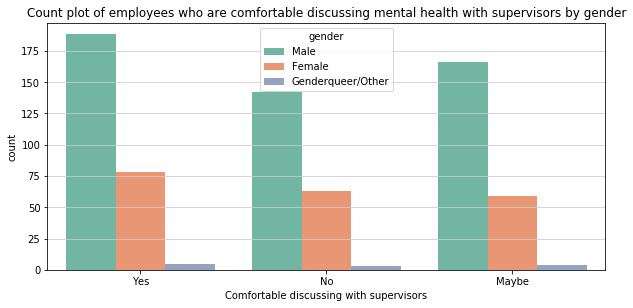

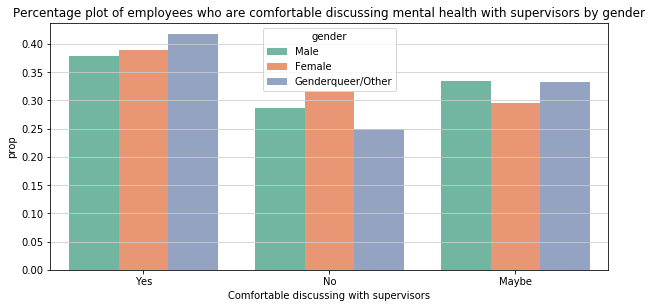

In [131]:
#Plotting count plot and percentage plot of employees who are comfortable discussing mental health with supervisors by gender
x, y, hue = "comfortable_discussing_with_supervisors", "prop", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No','Maybe'])

plt.title('Count plot of employees who are comfortable discussing mental health with supervisors by gender')
plt.xlabel('Comfortable discussing with supervisors')


prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order = ['Yes','No','Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])

plt.title('Percentage plot of employees who are comfortable discussing mental health with supervisors by gender')
plt.xlabel('Comfortable discussing with supervisors')

plt.show()


- Whether or not discussing mental health disorders with is more divided.
- Some people believe that discussing mental health disorders will result in a negative consequences.
- However, a larger proportion believe there won't be any negative consequences or unsure. This may be because they have already developed a employer-employee relationship and there is a layer of trust when it comes to talking about issues that are on people's minds.

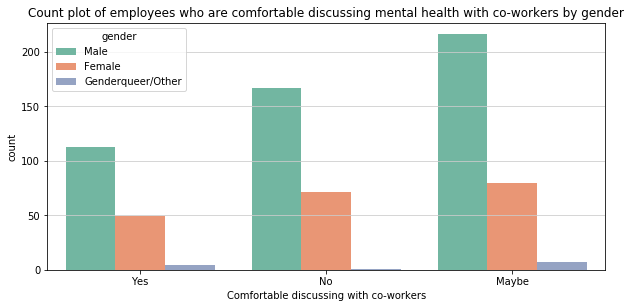

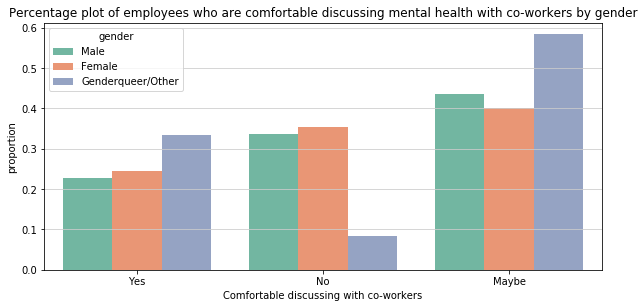

In [132]:
#Plotting count plot and percentage plot of employees who are comfortable discussing mental health with co-workers by gender
x, y, hue = "comfortable_discussing_with_coworkers", "proportion", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No','Maybe'])

plt.title('Count plot of employees who are comfortable discussing mental health with co-workers by gender')
plt.xlabel('Comfortable discussing with co-workers')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order = ['Yes','No','Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])

plt.title('Percentage plot of employees who are comfortable discussing mental health with co-workers by gender')
plt.xlabel('Comfortable discussing with co-workers')

plt.show()

- A large proportion of workers would not or unsure about confiding in issues with their co-workers
- This shows that workers in tech do not tend to socialize much or form deep relations 

## Part 2c -  Grouping by top 7 most populous states and DC

In [133]:
#Subsetting the populous states and DC
survey_8 = survey.query('work_state == "Illinois" | work_state == "New York" | work_state == "Texas" | work_state == "California" | work_state == "Michigan" | work_state == "District of Columbia"| work_state == "Minnesota"| work_state == "Washington"') 

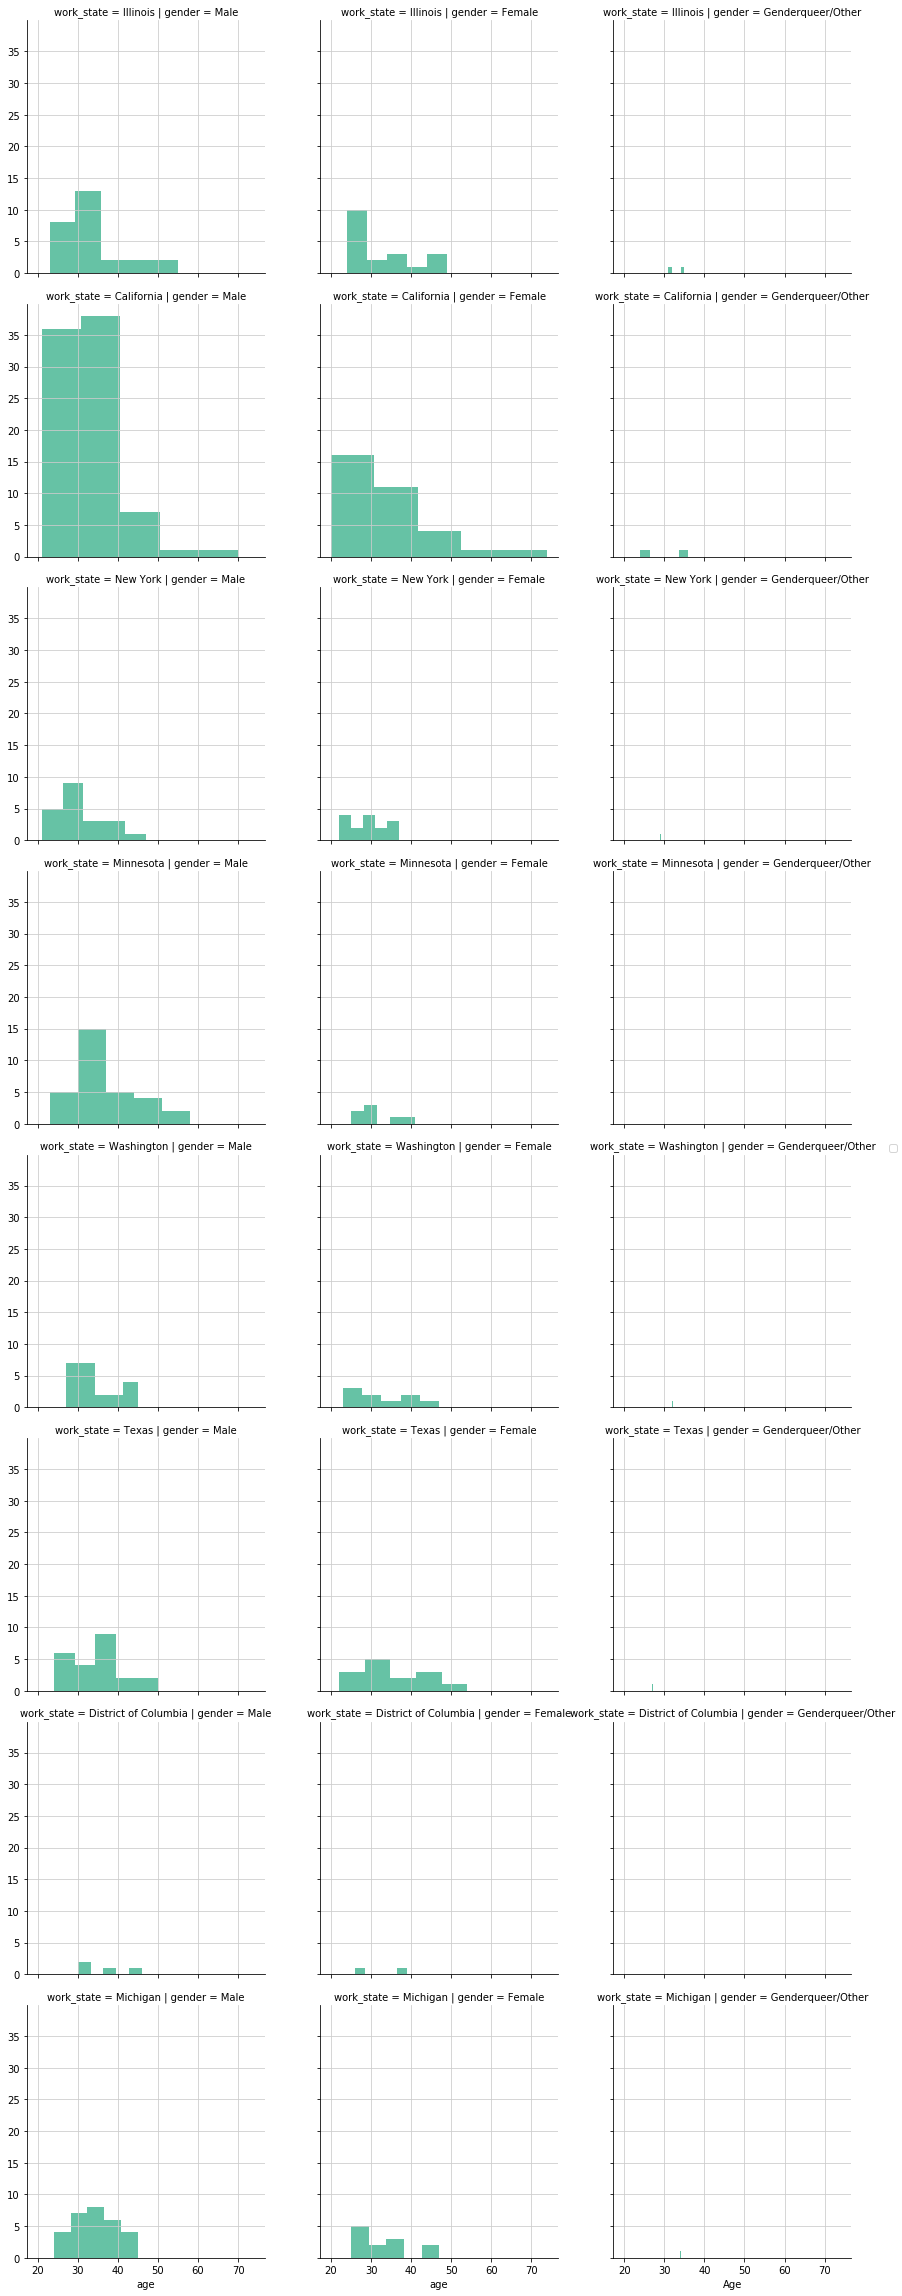

In [134]:
#Age distribution by state and gender
g = sns.FacetGrid(survey_8, row='work_state', col='gender', size=4)
g.map(plt.hist, 'age', alpha=1, bins=5)
plt.xlabel('Age')
g.add_legend()
plt.show()

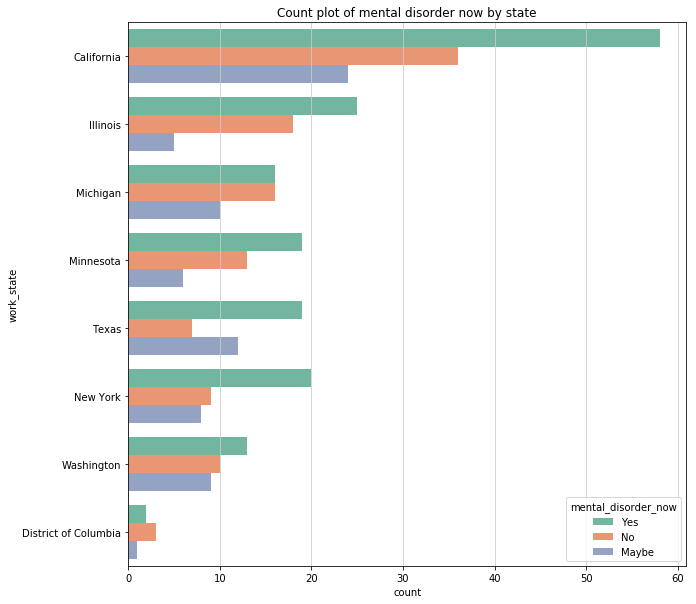

In [135]:
#Count plot of current mental disorder by state
x, y, hue = "work_state", "proportion", "mental_disorder_now"
hue_order = ["Yes", "No",'Maybe']


plt.figure(figsize=(10,10))

sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)

plt.title('Count plot of mental disorder now by state')




plt.show()



- There are more people who currently have mental disorder than those who don't for each state(except Michigan and DC) which is quite alarming

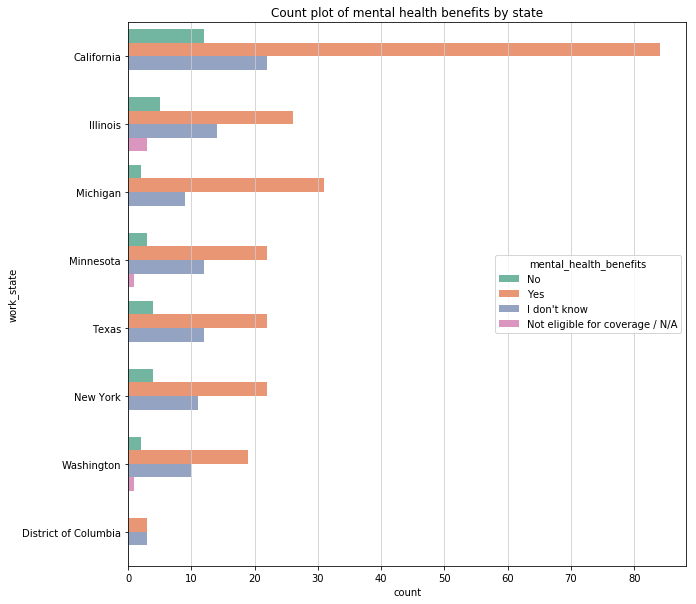

In [136]:
#Count plot of mental health benefits by state
x, y, hue = "work_state", "prop", "mental_health_benefits"
hue_order = ['No' 'Yes' "I don't know" 'Not eligible for coverage / N/A']


plt.figure(figsize=(10,10))

sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)

plt.title('Count plot of mental health benefits by state')

plt.show()


- In most of the states, significantly more mental health benefits are provided than those that aren't 

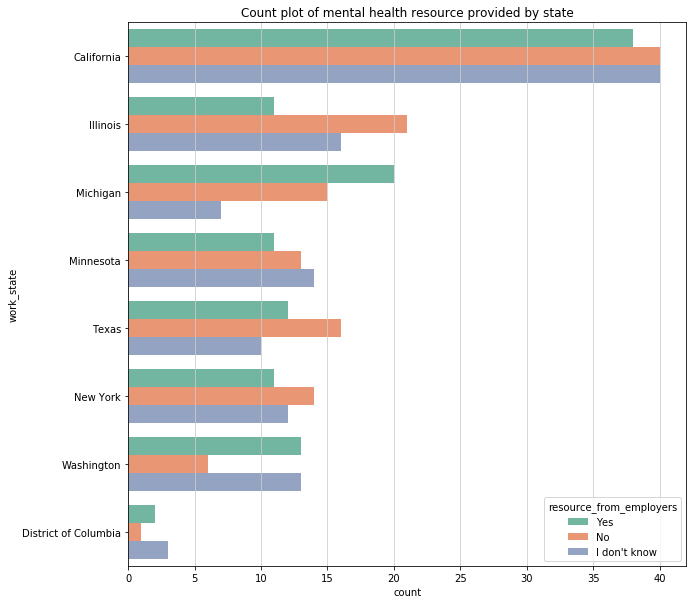

In [137]:
#Count plot of mental health benefits by state
x, y, hue = "work_state", "prop", "resource_from_employers"
hue_order = ["Yes", "No","I don't know"]


plt.figure(figsize=(10,10))


sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)
plt.title('Count plot of mental health resource provided by state')
plt.show()


- Most of the states have a higher proportion of employers that tend to provide resources except for Illinois and Michigan
- A large proportion of people are unsure about the resources maybe because they do not reach out or ask around since they also tend to confide less in co-workers and supervisors 

In [138]:
# Compressing categories so that they are easier to visualize
survey_8['ease_of_medical_leave'] = survey_8['ease_of_medical_leave'].replace([
    'Somewhat easy', 'Very easy'], 'Easy')
survey_8['ease_of_medical_leave'] = survey_8['ease_of_medical_leave'].replace([
    'Very difficult', 'Somewhat difficult'], 'Difficult')
survey_8['ease_of_medical_leave'].unique()
    

array(['Easy', 'Neither easy nor difficult', 'Difficult', "I don't know"], dtype=object)

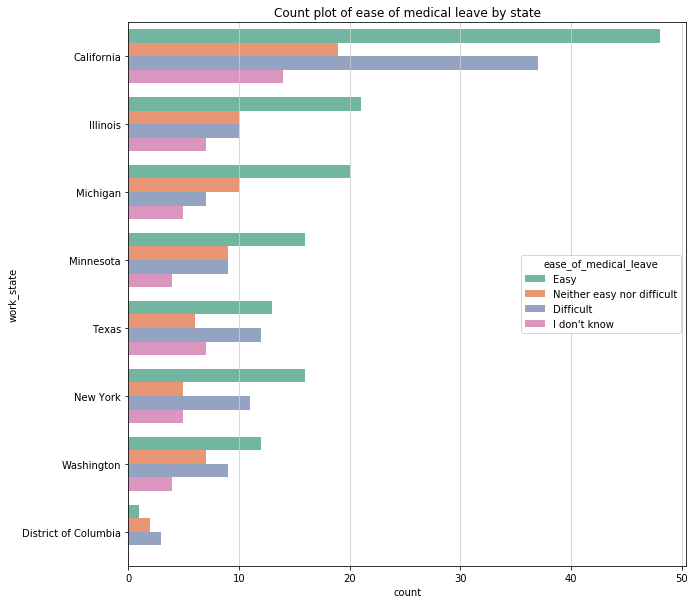

In [139]:
#Count plot of ease of medical leave by state
x, y, hue = "work_state", "prop", "ease_of_medical_leave"
hue_order = ['Easy', 'Neither easy nor difficult', 'Difficult', "I don't know"]


plt.figure(figsize=(10,10))

sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)
plt.title('Count plot of ease of medical leave by state')

plt.show()


- In most of the states, it is easy to take a medical leave but in Washington and Texas, the difficulty of taking a leave are of similar proportion

# Part 3 - Conclusion

Mental health problems are all around and can affect anyone at anytime. Many people still believe that mental health issues are stigmatized and hence refrain from reaching out. The companies they work in do provide resources, benefits and leaves to some extent but still more than half of the surveyed workers are currently diagnosed of having a mental health disorder. If workers can be made to reach out more and eliminate the stigma surrounding mental health, then mental health disorders can be greatly reduced.